# **Project 17**: Post-Event Damage Assessment Using News Article Analysis 

## Group Members:
- Walid Nouicer (wnouicer24@student.oulu.fi)
- Uswah Batool (uswah.batool@student.oulu.fi)
- Piero Campos Villagaray (pcamposv25@student.oulu.fi)

________________

### Task 1: Event Selection and Data Collection

In [1]:
from task_1 import get_urls, get_articles, articles2csv, append_article_to_csv

# get_urls() can be used to extract urls from news sources
# if no news sources are passed in function parameters, the function uses a default list
# this process can take a very long time, for the sake of the demo we will use a preset example
# the natural disaster we will be using as an example is Hurricane Melissa, which is an active
# Atlantic hurricane currently accelerating northeastward away from the Bahamas and toward Bermuda.
example_urls = [
    "https://www.aljazeera.com/gallery/2025/10/30/hurricane-melissa-leaves-trail-of-destruction-across-northern-caribbean",
    "https://apnews.com/article/hurricane-melissa-jamaica-cuba-landslide-rain-flood-d7d120b8443b1630d12c77e0a3fe25b0",
]

# get_articles() filters and scrapes article data from urls based on qwery words passed into the function
# we can save articles to a csv file during he function's runtime by setting live_save=True, default value is False
# default path for the csv fileis "data/articles.csv"
qw = ["hurricane", "melissa"]
example_articles = get_articles(example_urls, qw, limit=200, live_save=False)
for article in example_articles:
    print(f"\nTitle: {article[0]}\ndate: {article[1]}\nSource: {article[2]}\nText: {article[3][:200]}...\n")
    print("___________________________________________________________")

Prcessing https://www.aljazeera.com/gallery/2025/10/30/hurricane-melissa-leaves-trail-of-destruction-across-northern-caribbean...
Added https://www.aljazeera.com/gallery/2025/10/30/hurricane-melissa-leaves-trail-of-destruction-across-northern-caribbean to articles
Prcessing https://apnews.com/article/hurricane-melissa-jamaica-cuba-landslide-rain-flood-d7d120b8443b1630d12c77e0a3fe25b0...
Added https://apnews.com/article/hurricane-melissa-jamaica-cuba-landslide-rain-flood-d7d120b8443b1630d12c77e0a3fe25b0 to articles

Title: Hurricane Melissa leaves trail of destruction across northern Caribbean
date: 2025-10-30 00:00:00
Source: https://www.aljazeera.com
Text: The northern Caribbean has suffered widespread destruction in Hurricane Melissa’s aftermath, with casualties mounting across multiple islands.

Across Jamaica, the urgent sounds of heavy machinery, ch...

___________________________________________________________

Title: What to know about Hurricane Melissa as death toll rises
date

### Task 2: Data Cleaning and Preprocessing

In [2]:
from task_2 import load_file, clean_text

# load_file() automatically loads data from "data/articles.csv", a different path can be passed in function params
# data = load_file()

# clean_text() performs lemmatization, and removes stopwords, punctuation, symbols, and converts text to lowecase
# cleaned_data = clean_text(data)

# articles2csv() can be used to save the processed data
# articles2csv(
#     articles=cleaned_data,
#     path="data/cleaned_data.csv",
#     fields=["title", "date", "source", "article_text", "clean_text"],
# )

# the clean_text column is saved as a long string for convenience
print(f"{load_file(path="data/cleaned_data.csv")[1][4][:100]}...")

melissa rapidly intensify weekend rare category hurricane mph wind national hurricane center expect ...


### Task 3: Language Filtering and Quality Check

In [3]:
import pandas as pd
from task_3 import filter_english_articles_with_descriptive_stats

# filter_english_articles_with_descriptive_stats() filters non-english and duplicate 
# articles, then prints a quality report

data = pd.read_csv("data/cleaned_data.csv")
filter_english_articles_with_descriptive_stats(data)


DATA QUALITY REPORT
Total valid English articles: 16
Average text length (in words): 623.38 words
Number of articles before: 18
Number of articles now: 16
Duplicate articles removed: 2
Saved filtered dataset to data/filtered_articles.csv


### Task 4: Keyword Extraction and Frequency Analysis

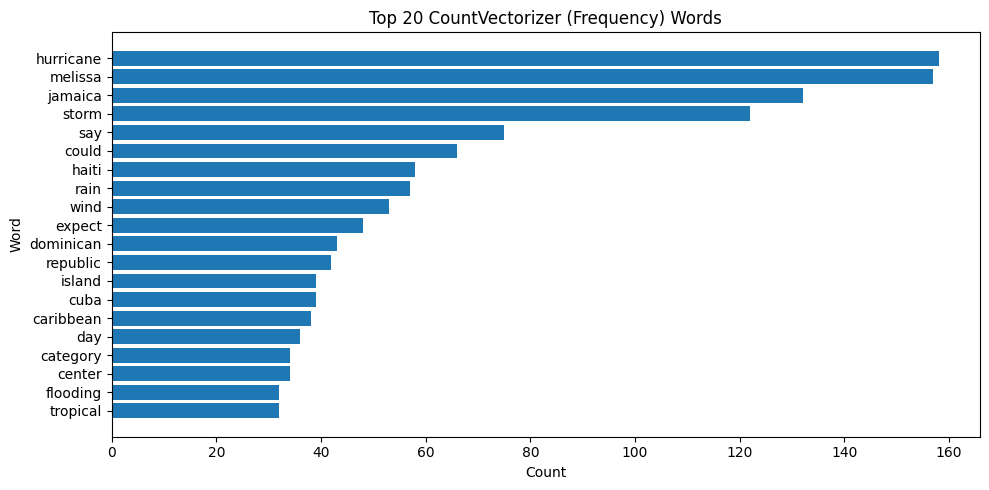

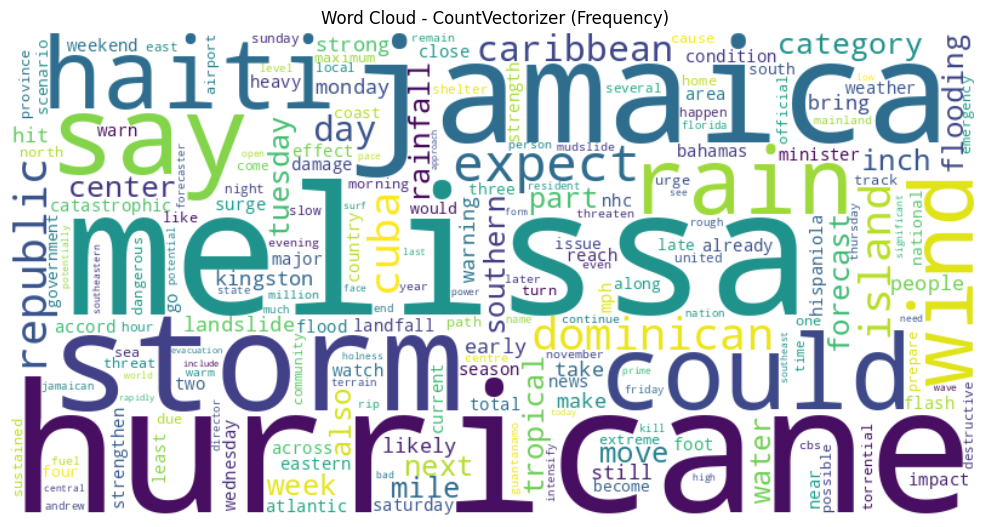

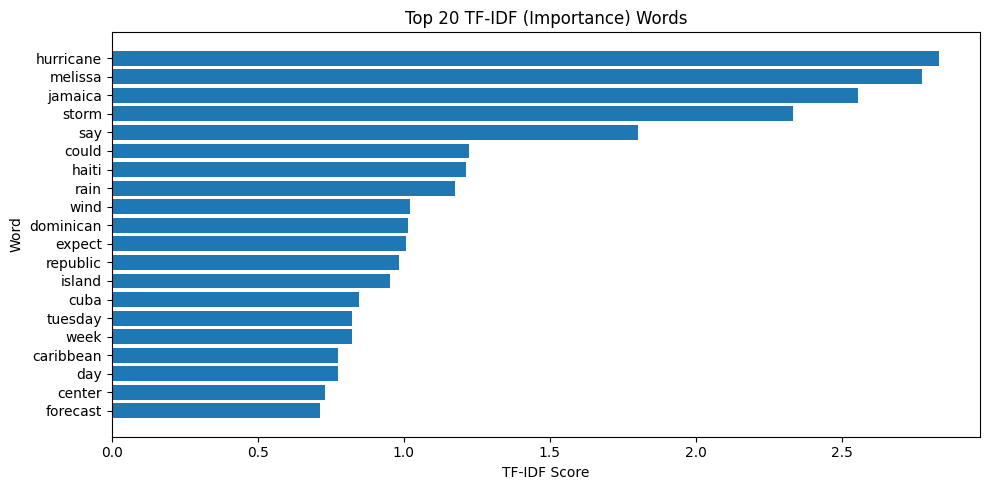

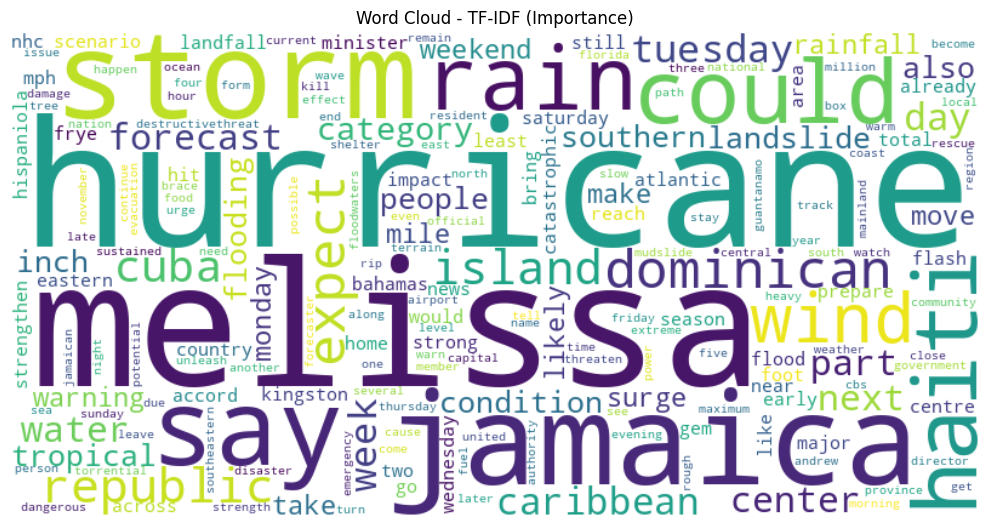


 Keyword extraction complete! Saved to data/articles_top_keywords.csv


In [4]:
from task_4 import plot_and_save, keyword_analysis

# keyword_analysis() extract top keywords using both CountVectorizer and TF-IDF,
# visualize results in bar charts and word clouds
data = pd.read_csv("data/filtered_articles.csv")
keyword_analysis(data)

### Task 5: Corpus Statistical Analysis and Zipf’s Law

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/wnouicer24/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


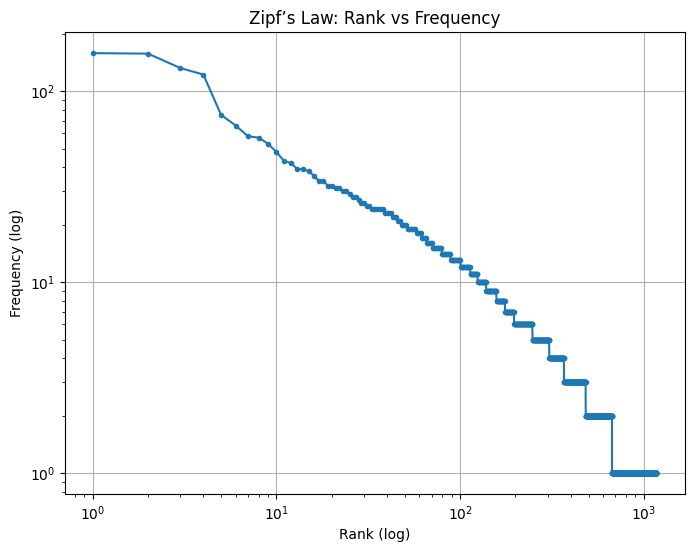

Estimated Zipf slope: -0.99
Corpus roughly follows Zipf’s Law.


In [5]:
from task_5 import zipf_analysis

# zipf_analysis() performs Zipf’s Law analysis and visualize rank-frequency relationship
data = pd.read_csv("data/filtered_articles.csv")
zipf_analysis(data)

### Task 6: Lexical and Readability Analysis

In [6]:
from task_6 import analyze_article_metrics

df = pd.read_csv(r"data/articles.csv") 
print(f"Total articles loaded: {len(df)}")

# analyze_article_metrics() calculates lexical metrics and returns results
lexical_results = []
for idx, row in df.iterrows():
    result = analyze_article_metrics(row)
    if result is not None:
        lexical_results.append(result)

lexical_df = pd.DataFrame(lexical_results)

print("\n" + "=" * 70)
print("LEXICAL METRICS SUMMARY")
print("=" * 70)
print(lexical_df.describe())  ## Summary Table

print("\nSENTENCE COUNT:")
print(f"  Min sentences: {lexical_df['sentence_count'].min()}")
print(f"  Max sentences: {lexical_df['sentence_count'].max()}")
print(f"  Mean sentences: {lexical_df['sentence_count'].mean():.1f}")

lexical_df.to_csv(r"data/Lexical_Analysis.csv", index=False)
print(f"\n Results saved to 'Lexical_Analysis.csv'")

[nltk_data] Downloading package punkt to /home/wnouicer24/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Total articles loaded: 18

LEXICAL METRICS SUMMARY
       article_id        ttr      msttr  lexical_density  flesch_reading_ease  \
count   18.000000  18.000000  18.000000        18.000000            18.000000   
mean     8.500000  47.025028  71.714220        46.009633            47.311894   
std      5.338539   6.961868   4.018034         1.719556             8.085550   
min      0.000000  35.000000  60.166667        43.485618            36.003235   
25%      4.250000  42.030120  70.017857        44.460299            42.434238   
50%      8.500000  47.284906  72.737500        46.276126            47.077302   
75%     12.750000  51.516497  74.575000        46.950629            48.392193   
max     17.000000  62.844037  77.142857        49.931601            67.075015   

       gunning_fog   word_count  sentence_count  avg_sentence_length  
count    18.000000    18.000000       18.000000            18.000000  
mean     14.837194   773.166667       31.666667            24.587156  
std   

### Task 7: Sentiment and Emotion Detection

In [7]:
from task_7 import comprehensive_analysis



# Load DataFrame
# df = pd.read_csv(r".\data\cleaned_data.csv")
df = pd.read_csv(r"data/cleaned_data.csv")
print(f"\nLoaded {len(df)} articles")


# Execute the analysis

sentiment_df = comprehensive_analysis(df)

# Saved
# sentiment_df.to_csv(r".\data\sentiment_emotion_analysis.csv", index=False)
sentiment_df.to_csv(r"data/sentiment_emotion_analysis.csv", index=False)
print(f"Results saved to 'sentiment_emotion_analysis.csv'")

# Statistics

print("\n" + "=" * 70)
print("DESCRIPTIVE STATISTICS")
print("=" * 70)

# Sentiment
print("\nSENTIMENT ANALYSIS (VADER):")
sentiment_cols = ["vader_compound", "vader_positive", "vader_negative", "vader_neutral"]
print(sentiment_df[sentiment_cols].describe())

# Emotions
print("\nEMOTION DETECTION (Hugging Face Transformer):")
emotion_cols = ["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]
print(sentiment_df[emotion_cols].describe())

# Important things

print("\n" + "=" * 70)
print("KEY FINDINGS")
print("=" * 70)

# Average sentiment
avg_sentiment = sentiment_df["vader_compound"].mean()
print(f"\n Average Sentiment (VADER): {avg_sentiment:.3f}")
if avg_sentiment < -0.3:
    print("   - Highly negative ")
elif avg_sentiment < -0.1:
    print("   - Moderately negative")
else:
    print("   - Neutral/Mixed coverage")

# Top 3 emotions
print("\nTop 3 Emotions (by average intensity):")
avg_emotions = sentiment_df[emotion_cols].mean().sort_values(ascending=False)
for i, (emotion, score) in enumerate(avg_emotions.head(3).items(), 1):
    print(f"   {i}. {emotion.capitalize():10s}: {score:.3f}")

# Fear/Sadness analysis
fear_avg = sentiment_df["fear"].mean()
sadness_avg = sentiment_df["sadness"].mean()
fs_ratio = sentiment_df["fear_sadness_ratio"].mean()

print(f"\nFear vs Sadness Analysis:")
print(f"   Fear average:    {fear_avg:.3f}")
print(f"   Sadness average: {sadness_avg:.3f}")


Initializing models...
VADER sentiment analyzer is loaded


Device set to use cpu


Emotion classifier is loaded

Loaded 18 articles

🔍 Analyzing articles...
   Using VADER for sentiment + Transformers for emotions


Processing:  39%|███▉      | 7/18 [00:00<00:00, 61.99it/s]

   Error: The expanded size of the tensor (666) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 666].  Tensor sizes: [1, 514]
   Error: The expanded size of the tensor (666) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 666].  Tensor sizes: [1, 514]
   Error: The expanded size of the tensor (637) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 637].  Tensor sizes: [1, 514]
   Error: The expanded size of the tensor (542) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 542].  Tensor sizes: [1, 514]
   Error: The expanded size of the tensor (579) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 579].  Tensor sizes: [1, 514]
   Error: The expanded size of the tensor (550) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 550].  Tensor sizes: [1, 514]
   Error: The expanded size 

Processing: 100%|██████████| 18/18 [00:01<00:00, 11.14it/s]

Results saved to 'sentiment_emotion_analysis.csv'

DESCRIPTIVE STATISTICS

SENTIMENT ANALYSIS (VADER):
       vader_compound  vader_positive  vader_negative  vader_neutral
count       18.000000       18.000000       18.000000      18.000000
mean        -0.523933        0.093667        0.120056       0.786167
std          0.764895        0.039941        0.042066       0.039949
min         -0.996700        0.030000        0.038000       0.728000
25%         -0.986075        0.072000        0.089750       0.752500
50%         -0.945300        0.083000        0.113000       0.778500
75%         -0.461900        0.108750        0.149000       0.815000
max          0.980600        0.182000        0.215000       0.884000

EMOTION DETECTION (Hugging Face Transformer):
           anger    disgust       fear        joy    neutral    sadness  \
count  18.000000  18.000000  18.000000  18.000000  18.000000  18.000000   
mean    0.034898   0.000407   0.435240   0.041911   0.007735   0.021087   
std 

### Task 8: Named Entity and Quantitative Impact Analysis

{'PERSON': ['Melissa', 'Melissa', 'Melissa', 'Melissa', 'Evan Thompson', 'Melissa', 'Melissa', 'Gabrielle', 'Humberto', 'Melissa', 'Rainfall', 'Melissa', 'Melissa', 'Melissa', 'Christopher Tufton', 'Desmond McKenzie', 'Norman Manley', 'Daryl Vaz', 'Vaz', 'Melissa', 'Melissa', 'Clive Davis', 'Beryls', 'Davis', 'Melissa', 'Melissa', 'Melissa', 'Melissa', 'Melissa', 'Melissa', 'Evan Thompson', 'Melissa', 'Melissa', 'Gabrielle', 'Humberto', 'Melissa', 'Rainfall', 'Melissa', 'Melissa', 'Melissa', 'Christopher Tufton', 'Desmond McKenzie', 'Norman Manley', 'Daryl Vaz', 'Vaz', 'Melissa', 'Melissa', 'Clive Davis', 'Beryls', 'Davis', 'Melissa', 'Melissa', 'Storm Melissa', 'Melissa', 'Melissa', 'Melissa', 'Storm Melissa', 'Eddy Vittini/', 'Melissa', 'Melissa', 'Melissa', 'Melissa', 'Gabrielle', 'Humberto', 'Melissa', 'Melissa', 'Melissa', 'Christopher Tufton', 'Daryl Vaz', 'Andrew Holness', 'Melissa', 'Melissa', 'Melissa', 'Melissa', 'Mountains', 'Melissa', 'Storm Melissa', 'Melissa', 'Melissa', 

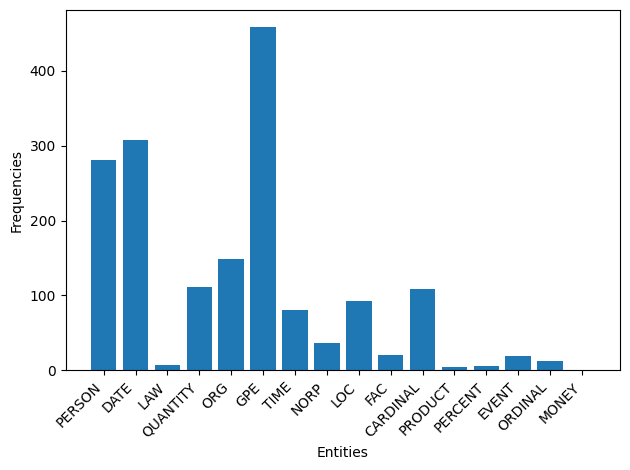

In [8]:
from task_8 import damage_summary, plot_entity_frequency, aggregate_text, affected_regions, affected_regions_summary

# damage_summary() calculate the number of instances in a dataset where and entity
# is labeled as MONEY or CARDINAL. for the latter case, filter out
# sentences describing distance or speed measurements.

aggr_text = aggregate_text(data=load_file()[1:])
plot_entity_frequency(aggr_text)
print("_________________________________________________________________\n")
regions = affected_regions(aggr_text)
affected_regions_summary(regions, top_n=10)

### Task 9: Event Impact Scoring Model

In [9]:
from task_9 import impact2csv
from colored_text import bcolors
data = load_file("data/cleaned_data.csv")

# impact2csv() takes csv data and computes sentiment polarity, emotion intensity, damage-related keywords frequency, and impact score
# then saves the result into a csv file and returns the generated data with articles sorted based on impact score
scored_articles = impact2csv(in_data=data)

for article in scored_articles[1:]:
    title, source, polarity, intensity, damage, impact = article
    print(f"{bcolors.BLUE}Article title: {bcolors.ENDC}", title)
    print(f"{bcolors.BLUE}Source: {bcolors.ENDC}", source)
    print(f"{bcolors.RED}Sentiment polarity = {bcolors.ENDC}", polarity)
    print(f"{bcolors.RED}Emotion intensity = {bcolors.ENDC}", intensity)
    print(f"{bcolors.RED}Damage-related keywords frequency = {bcolors.ENDC}", damage)
    print(f"{bcolors.YELLOW}Impact score = {bcolors.ENDC}", impact)
    print("________________________________________________________________________________________________\n")

Article title:  Hurricane Melissa threatens to bring catastrophic flooding, landslides to Jamaica, Haiti, Cuba
Source:  https://www.cbsnews.com
Sentiment polarity =  -0.07115384615384615
Emotion intensity =  {'neg': 3.787, 'neu': 25.114999999999995, 'pos': 1.097, 'compound': -6.701299999999998}
Damage-related keywords frequency =  8
Impact score =  -0.4232783653846153
________________________________________________________________________________________________

Article title:  Hurricane Melissa is now a rare Category 5 storm as it closes in on a historic, catastrophic landfall in Jamaica
Source:  https://www.cnn.com
Sentiment polarity =  -0.04202586206896552
Emotion intensity =  {'neg': 3.3619999999999997, 'neu': 45.711, 'pos': 1.928, 'compound': -3.3154000000000003}
Damage-related keywords frequency =  4
Impact score =  -0.4196782327586207
________________________________________________________________________________________________

Article title:  Hurricane Melissa is now a rar

### Task 10: Statistical Summary and Visualization Dashboard